In [ ]:
import pandas as pd
import numpy as np
#reading data
data = pd.read_csv('Caravan.csv')
# dropping first column (of no use)
data.drop('Unnamed: 0', inplace=True, axis=1)
data

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,...,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,...,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,...,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,...,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,36,1,1,2,8,0,6,1,2,1,2,6,5,3,2,2,5,2,2,0,0,4,1,3,2,3,3,3,0,9,0,5,1,3,5,4,4,3,3,0,...,6,0,4,0,0,0,0,0,3,0,0,0,3,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,No
5818,35,1,4,4,8,1,4,1,4,6,0,3,2,2,5,0,0,9,2,1,1,3,3,2,0,4,5,0,0,3,6,6,1,2,6,3,0,9,0,0,...,0,0,0,0,1,0,0,3,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,No
5819,33,1,3,4,8,0,6,0,3,5,1,4,3,3,4,0,1,8,1,0,0,2,3,5,1,1,1,4,4,7,2,4,0,5,8,1,5,3,1,1,...,6,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Yes
5820,34,1,3,2,8,0,7,0,2,7,2,0,0,4,5,0,2,7,0,2,0,2,4,2,0,0,4,5,0,2,7,5,4,0,9,0,0,5,4,0,...,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No


In [ ]:
#head of data
data.head(5)

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,...,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,...,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,...,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,...,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No


**Let's see the Target Variable distribution:**

In [ ]:
cc = data['Purchase'].value_counts()
print(cc)
print("Purchased Percentage:")
print(cc[1]/(cc[1]+cc[0])*100)

No     5474
Yes     348
Name: Purchase, dtype: int64
Purchased Percentage:
5.977327378907591


# Higly Imabalanced Dataset: <br>
We can see that The number of Purchased records in dataset is very low ~ 6 % <br>

In [ ]:
X = data.iloc[:, :-1].values

#Separating the last column i.e. "Purchase" [Target Variable]
y = data.iloc[:,-1].values

# Since it is in Yes/No format, changing to 1/0
for i in range(0,data.shape[0]):
    #print(data.loc[i].at["Purchase"])
    if(data.loc[i].at["Purchase"] == "No"):
        y[i] = 0
    else:
        y[i] = 1

#Converting the type
y = y.astype('int')
y

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
#Data Summary
data.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,...,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.00000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,0.883545,2.290450,1.887667,3.230333,4.300240,1.461010,3.351254,4.572484,1.895053,0.397973,0.522329,2.899004,2.219856,2.306424,1.620749,1.606836,2.202508,3.758674,1.067331,4.236860,4.771728,6.040364,1.316386,1.959464,6.277053,2.728959,2.573686,3.536070,2.731364,0.796118,...,0.071625,2.970457,0.048265,0.175369,0.009447,0.020955,0.092580,0.013054,0.215046,0.194778,0.013741,0.015287,0.023531,1.827722,0.000859,0.018894,0.025249,0.01563,0.047578,0.402954,0.014772,0.020611,0.562178,0.010477,0.041051,0.002233,0.012539,0.033665,0.006183,0.070423,0.076606,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,0.965924,1.722645,1.799928,1.619973,2.005283,1.622967,1.761052,2.298125,1.798321,0.775073,1.056926,1.839675,1.730840,1.692843,1.722882,1.330664,1.529319,1.935568,1.303175,3.089302,3.089837,1.552799,1.203072,1.599714,1.978675,1.981893,2.086099,1.882656,1.927738,1.162829,...,0.499980,2.920669,0.531346,0.897222,0.244675,0.212738,0.603076,0.228906,0.813133,0.898100,0.209260,0.192471,0.375274,1.879290,0.043462,0.273028,0.156894,0.20456,0.409016,0.492631,0.134133,0.142092,0.604767,0.129991,0.228974,0.062819,0.125775,0.240755,0.124189,0.265112,0.377569,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,0.000000,1.000000,0.000000,2.000000,3.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1

## **Observation:** 
MOSTYPE i.e. Customer Sub-Type : Mean is around 24-25 [*young, low educated and young seniors* ] <br>
MGEMOMV i.e. Avg. Household Size: It is 2.6 <br>
MKOOPKLA i.e. Purchasing Power Class: 37-49% are in this class <br>


In [ ]:
###Try to find the row names with NaN values.
data.isnull().sum(axis=0) 

MOSTYPE     0
MAANTHUI    0
MGEMOMV     0
MGEMLEEF    0
MOSHOOFD    0
           ..
APLEZIER    0
AFIETS      0
AINBOED     0
ABYSTAND    0
Purchase    0
Length: 86, dtype: int64

### There is no NULL or nan Value in dataset.

# Correlations:

In [ ]:
# Correlations Matrix
data.corr()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,...,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
MOSTYPE,1.000000,-0.038721,-0.021997,0.009454,0.992672,-0.193613,0.090399,-0.025642,-0.019505,-0.065596,-0.016270,0.086939,0.029240,-0.066250,0.023408,-0.473606,-0.278429,0.525678,-0.418615,-0.117736,0.248598,-0.206198,0.304749,0.273051,-0.392931,-0.188518,-0.038078,0.386104,0.204630,0.148998,-0.149988,-0.177830,0.037795,0.155497,0.351784,-0.352164,0.201531,0.161055,-0.255483,-0.188590,...,0.076396,-0.008459,-0.027940,-0.003587,0.018422,0.031749,0.096665,0.032408,0.024879,-0.043140,0.028420,-0.015115,0.001364,-0.009755,0.014379,-0.018116,-0.012124,-0.017327,-0.059084,-0.032937,-0.004066,0.079674,-0.008274,-0.027822,-0.012530,0.018883,0.030461,0.092055,0.020123,0.032137,-0.028829,0.021707,-0.012060,-0.002909,-0.011512,0.007801,-0.018162,-0.015774,-0.021087,-0.053718
MAANTHUI,-0.038721,1.000000,0.010102,0.056975,-0.045817,-0.006136,-0.024360,0.012056,0.020540,0.023025,-0.038566,-0.012544,0.032535,-0.082919,0.042143,0.003419,-0.053171,0.036529,-0.005747,0.042438,-0.018175,0.005762,0.024802,-0.052345,-0.014437,0.009924,-0.025303,-0.007345,0.020671,-0.049127,0.048361,-0.011175,0.023661,-0.011086,-0.016135,0.015282,0.014721,-0.024334,0.015371,0.001929,...,-0.028046,-0.026229,-0.019982,-0.016483,-0.010525,-0.010934,-0.030618,-0.008149,-0.013790,0.019118,0.008396,0.011338,-0.017093,-0.001363,-0.005387,0.004391,-0.016890,0.008141,-0.003767,0.042531,0.004693,-0.027627,-0.029427,-0.018716,-0.019295,-0.009690,-0.010349,-0.027570,-0.006756,-0.013336,0.020926,0.003321,0.009444,-0.016333,0.000655,-0.006189,0.000666,-0.020993,0.018304,-0.004166
MGEMOMV,-0.021997,0.010102,1.000000,-0.328257,0.016115,0.013105,0.049356,-0.108650,-0.005527,0.534798,-0.175586,-0.500735,-0.659553,-0.315960,0.794014,0.008053,0.039627,-0.038847,0.023796,0.035698,0.106960,-0.004949,0.037590,-0.161246,0.063097,0.011570,0.058552,-0.019022,-0.186612,-0.339429,0.338389,0.251917,0.200070,-0.401747,-0.073419,0.073875,-0.369531,0.044185,0.256645,0.104698,...,0.034340,0.021131,-0.003170,0.021561,-0.000297,0.012459,0.058832,0.031747,0.023041,0.025971,0.003841,0.016483,0.017390,0.055998,0.008037,0.001857,0.030798,0.013003,0.034550,-0.043920,0.035062,0.036039,0.020598,-0.009047,0.013076,0.000608,0.014608,0.058681,0.027257,0.018615,0.017428,-0.000128,0.016760,0.018749,-0.009269,0.009234,0.000644,0.030330,0.025907,0.028384
MGEMLEEF,0.009454,0.056975,-0.328257,1.000000,0.003872,-0.037519,0.093654,0.057737,-0.119966,-0.040384,-0.307401,0.199774,0.236594,0.204225,-0.355754,-0.025792,-0.221676,0.178965,0.141389,0.058309,0.090716,-0.162686,-0.048103,0.034338,0.047820,-0.155802,-0.040360,-0.063555,0.244597,0.025264,-0.023182,-0.132548,-0.088501,0.197608,-0.122024,0.124200,0.175729,-0.053955,-0.148970,0.027676,...,0.007868,-0.015417,0.018838,-0.017172,-0.009928,0.012955,-0.000447,0.003377,-0.003899,-0.029134,0.019855,-0.006816,-0.001573,0.019326,0.000213,-0.004663,0.019205,-0.013612,-0.019373,-0.014320,-0.008249,0.007497,-0.015807,0.021958,-0.015571,-0.013046,0.006102,-0.005504,0.005630,0.000471,-0.025187,0.021070,-0.001747,0.000644,0.024417,0.000244,-0.001791,0.020612,-0.020042,-0.014540
MOSHOOFD,0.992672,-0.045817,0.016115,0.003872,1.000000,-0.199186,0.098493,-0.034566,-0.021466,-0.026619,-0.037509,0.052671,-0.003443,-0.075000,0.058619,-0.471620,-0.279497,0.524062,-0.412656,-0.115330,0.276882,-0.219405,0.305282,0.258888,-0.382017,-0.192616,-0.029731,0.379437,0.192

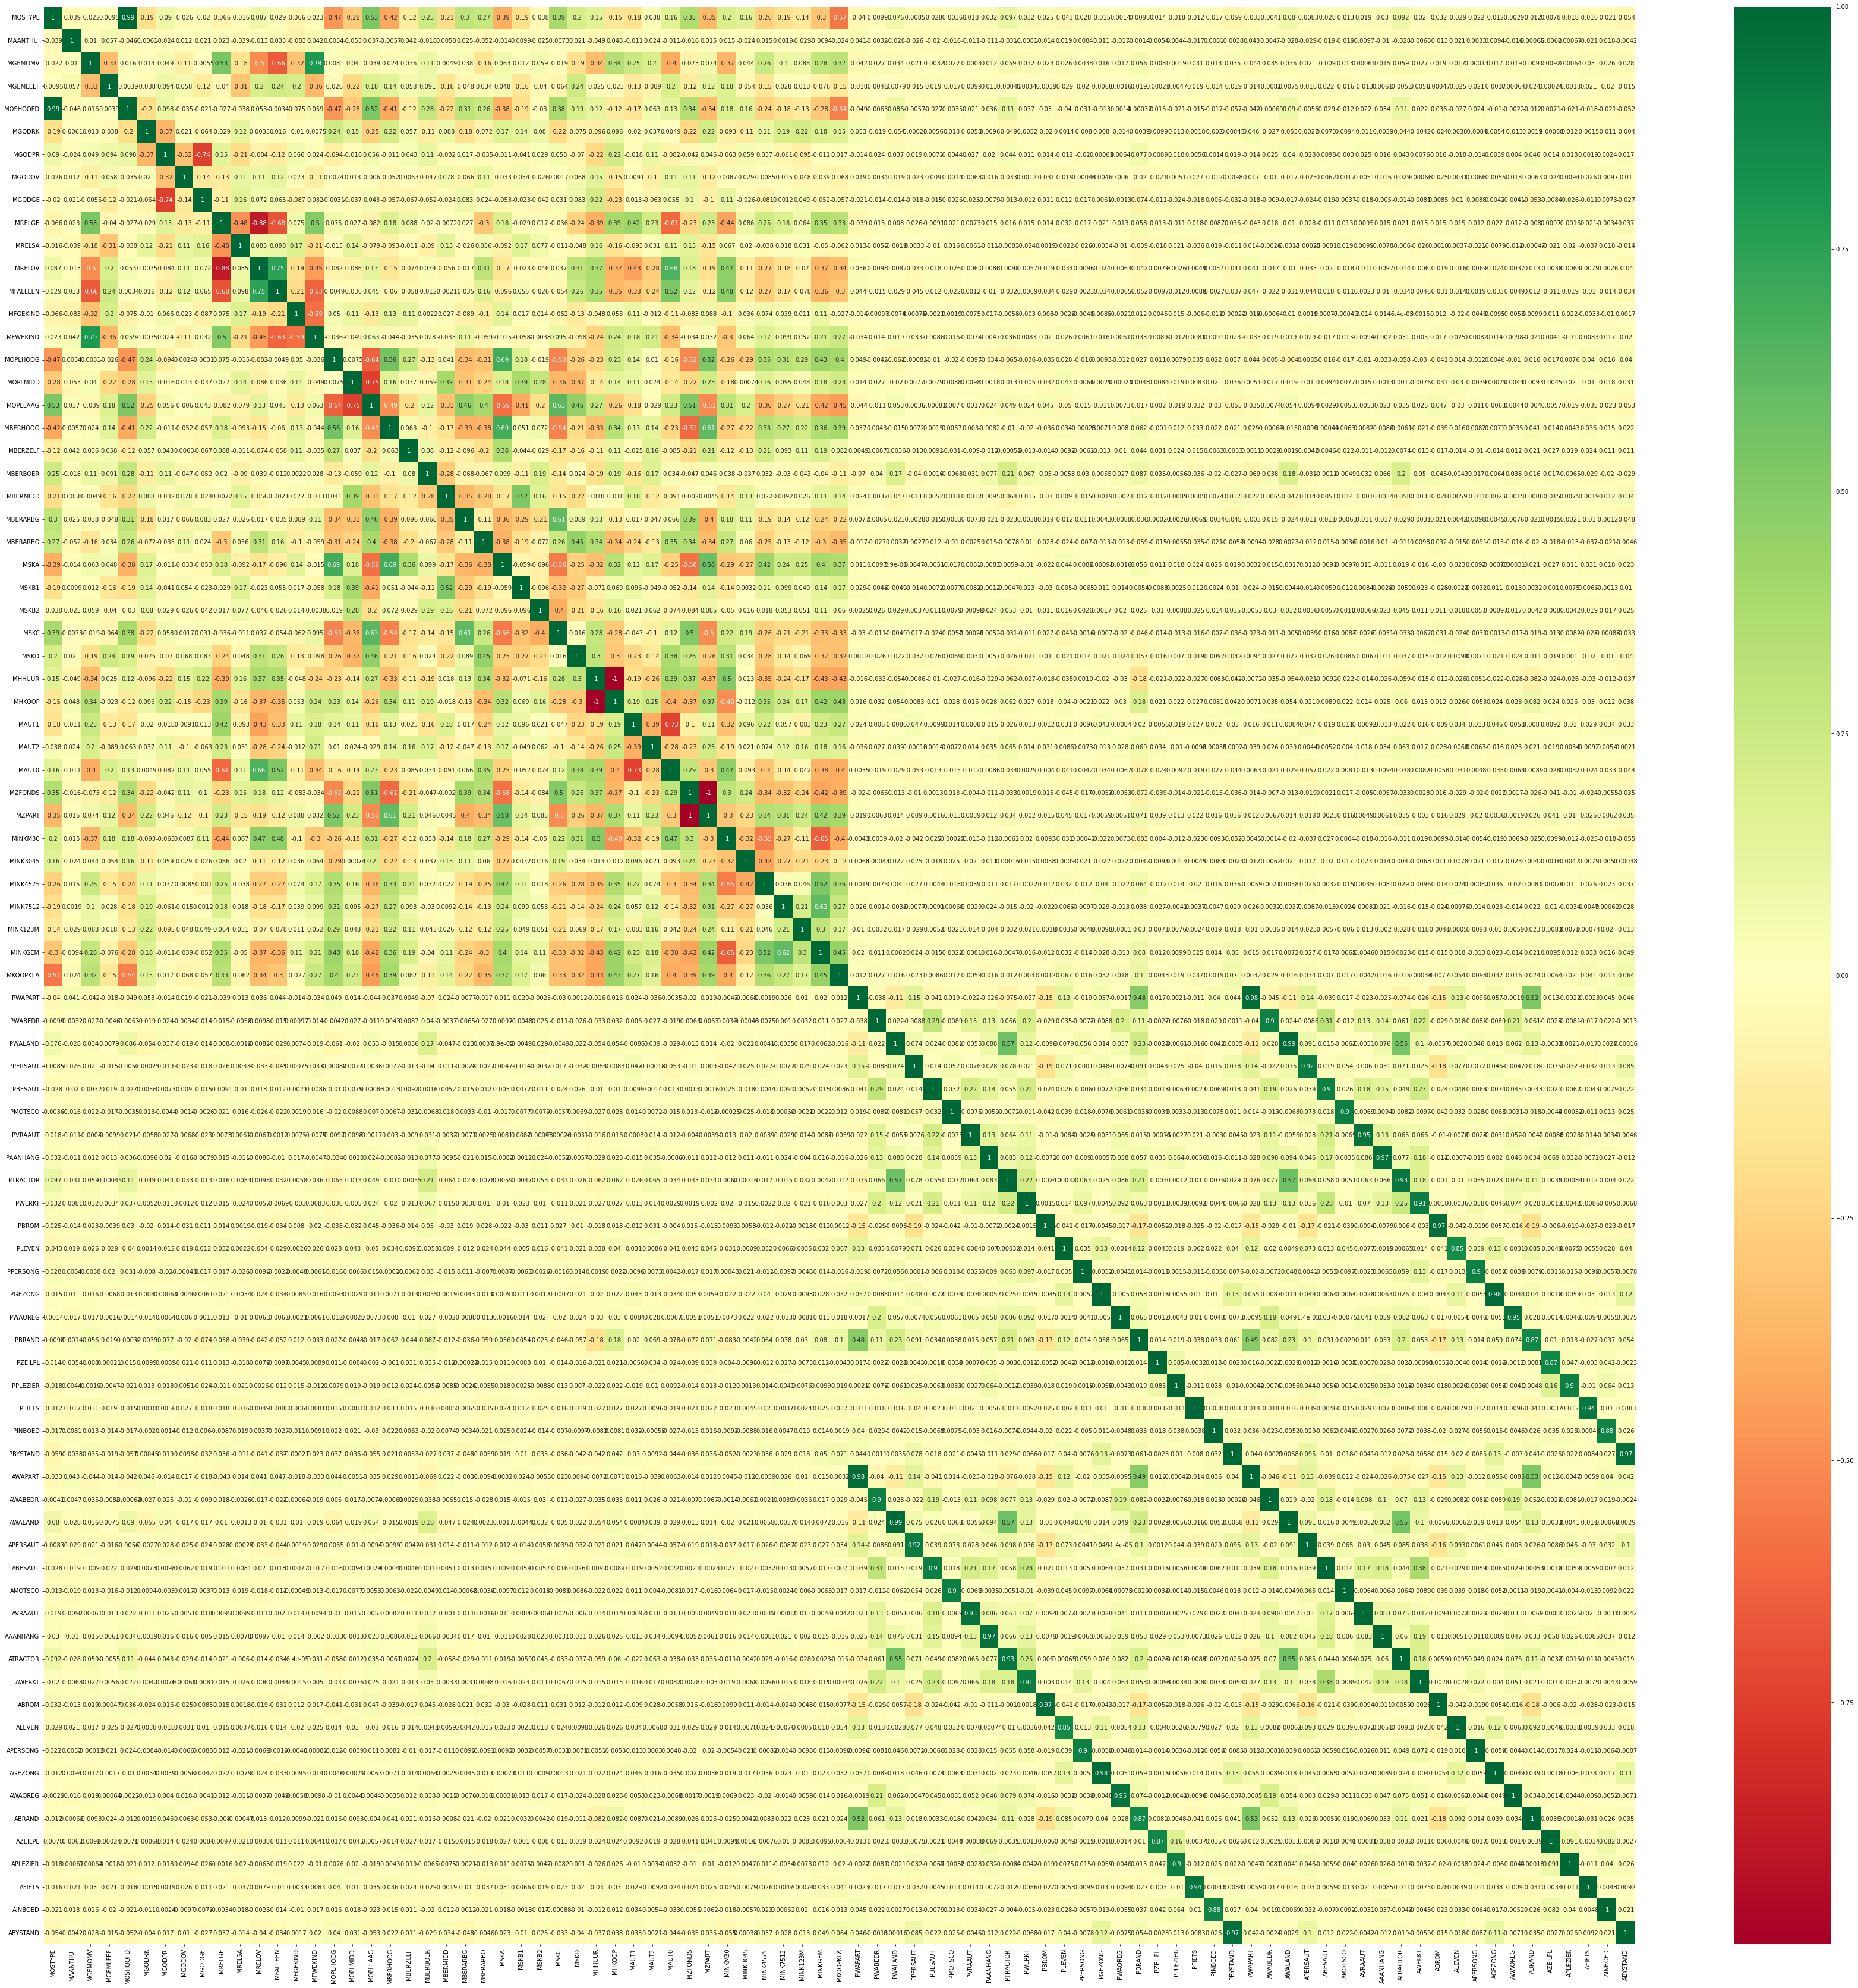

In [ ]:
#Correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt
#sns.heatmap(data.corr())

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(60,60))
#plot heat map
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")


Getting top Correlations

In [ ]:
# pandas dataframe
df = pd.DataFrame(data = data)

#Getting the most absolute Correlations
def most_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    au_corr = au_corr.sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
arr = most_abs_correlations(data, 300)
print(arr)

Top Absolute Correlations
ABYSTAND  ABYSTAND    1.000000
PINBOED   PINBOED     1.000000
PPLEZIER  PPLEZIER    1.000000
PZEILPL   PZEILPL     1.000000
PBRAND    PBRAND      1.000000
                        ...   
MRELGE    MAUT1       0.416807
MAUT1     MRELGE      0.416807
MOSHOOFD  MBERHOOG    0.412656
MBERHOOG  MOSHOOFD    0.412656
MSKB1     MOPLLAAG    0.406194
Length: 300, dtype: float64


In [ ]:
#saving the Top 300 Correlations to csv to analyze
arr.to_csv("top_corr.csv")

**From the CSV, WE can see that there is a correlation between: <br>**

MHHUUR [*Rented House*] vs MHKOOP [*Home owners*] <br> 

MOSTYPE [*Customer Sub Type*] and MOSHOOFD [*Customer Main Type*] <br>

Avg. Household vs Singles and many more






Based on above correlations and taking into consideration some imporatant metrics such as Avg. income, Purchasing power etc, Let's explore their relationships with each other and target variable using ggplot

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


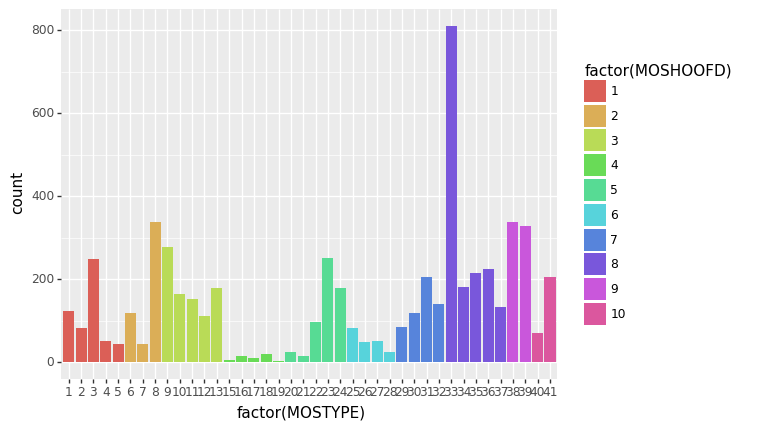

<ggplot: (8783316539625)>

In [ ]:
!pip install plotnine
from plotnine import ggplot, aes, geom_boxplot, geom_bar

# Customer Main type and Customer SubType
(
  ggplot(data)
  + aes(x="factor(MOSTYPE)", fill="factor(MOSHOOFD)")
  + geom_bar()
)

**We can see that:** <br>
Customer Sub-Type 1–5 represents Customer Main Type 1  <br>
Customer Sub-Type 6–8 represents Customer Main Type 2 <br>
Customer Sub-Type 9–13 represents Customer Main Type 3 <br>
 And So on... <br>

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


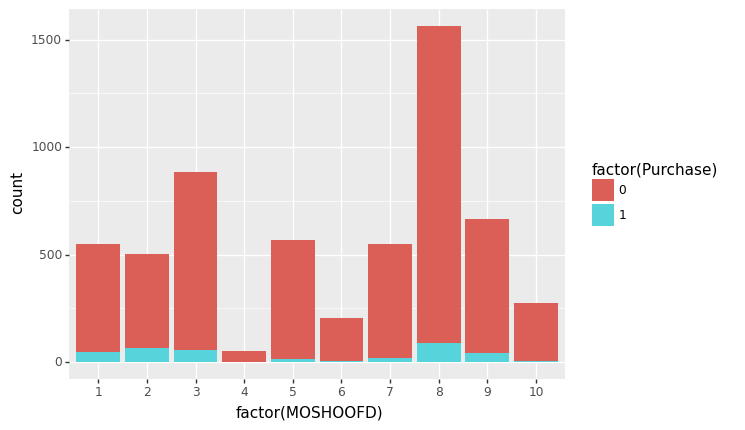

<ggplot: (8783288679341)>

In [ ]:
# Customer Policies vs Customer Main type
(
  ggplot(data)
  + aes(x="factor(MOSHOOFD)", fill="factor(Purchase)")
  + geom_bar()
)

**We can see that**: <br> 
Maximum Purchase is in Customer Main type  8 [*Family with grown ups*]<br>
Customer main type 4 (Career Loners) : 0

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


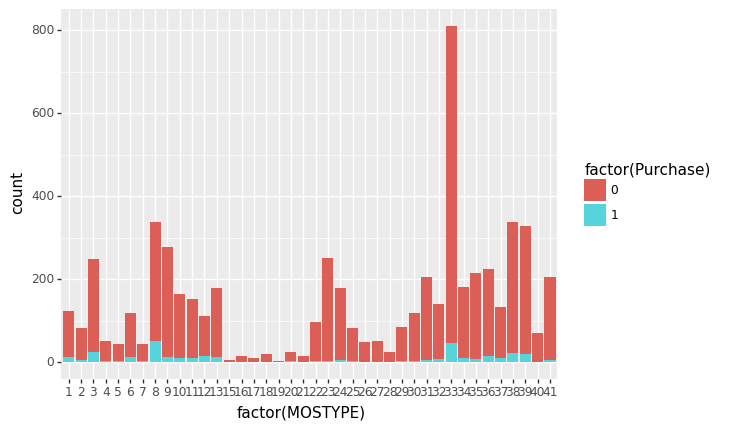

<ggplot: (8783288569557)>

In [ ]:
# Customer Policies vs Customer SubType
(
  ggplot(data)
  + aes(x="factor(MOSTYPE)", fill="factor(Purchase)")
  + geom_bar()
)

**We see that:** <br> 
Most Purchases : sub type 8 [Middle class families] and type 33 [Lower class large families]. <br>
Also Folowing subtypes have 0 purchases:
14 15 16 17 18 19 21 28 40 

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


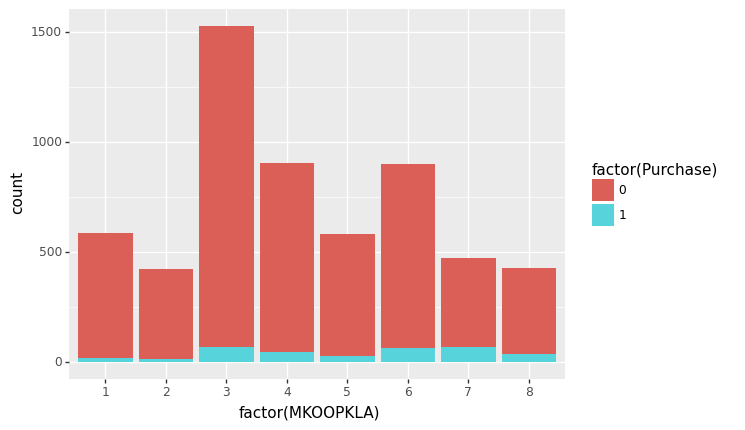

<ggplot: (8783288466037)>

In [ ]:
# Customer Policies vs Purchasing power

(
  ggplot(data)
  + aes(x="factor(MKOOPKLA)", fill="factor(Purchase)")
  + geom_bar()
)

Most of the Purchases are in Medium to high Purchasing power class.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


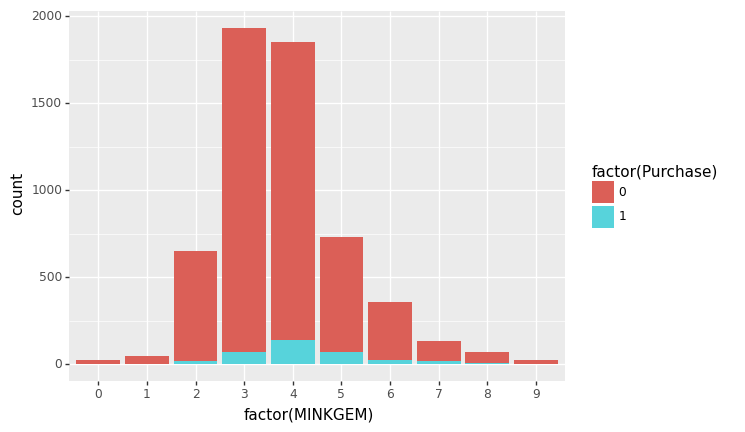

<ggplot: (8783288446613)>

In [ ]:
# Customer Policies vs AVg.Income

(
  ggplot(data)
  + aes(x="factor(MINKGEM)", fill="factor(Purchase)")
  + geom_bar()
)

Now converting the Customer main type and subtype columns to one hot encoding i.e. as they are categorical in original dataset

In [ ]:
# one hot encoding
one_hot_encoded_data = pd.get_dummies(data, columns = ['MOSHOOFD', 'MOSTYPE'])
print(one_hot_encoded_data)
X = one_hot_encoded_data.iloc[:, :].values
X.shape

# Removing the Purchase column
index_no = one_hot_encoded_data.columns.get_loc('Purchase')
print(index_no)
X = np.delete(X, index_no, 1)  # delete "index_no"th column of X
X.shape

      MAANTHUI  MGEMOMV  MGEMLEEF  ...  MOSTYPE_39  MOSTYPE_40  MOSTYPE_41
0            1        3         2  ...           0           0           0
1            1        2         2  ...           0           0           0
2            1        2         2  ...           0           0           0
3            1        3         3  ...           0           0           0
4            1        4         2  ...           0           1           0
...        ...      ...       ...  ...         ...         ...         ...
5817         1        1         2  ...           0           0           0
5818         1        4         4  ...           0           0           0
5819         1        3         4  ...           0           0           0
5820         1        3         2  ...           0           0           0
5821         1        3         3  ...           0           0           0

[5822 rows x 134 columns]
83


(5822, 133)

In [ ]:
import joblib, sys
sys.modules['sklearn.externals.joblib'] = joblib

# Feature Selection: <br>
Since there are total 134 columns, It would be infeasible to feed them into Logistic Regression or LDA. <br>

Let's do the feature selction using Forward Feature selction and Separately Dimensionality reduction using PCA. And Compare the observations.<br>



In [ ]:
#For forward Feature Selecton
!pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression

In [ ]:
lreg = LogisticRegression(max_iter = 10000)
#forward = True implies the Forward Feature selction
#orward  = false -> Backward Feature Selection
#k_features = No. of features to be selected
sfs1 = sfs(lreg, k_features=20, forward=True, verbose=2, scoring='neg_mean_squared_error')

In [ ]:
sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 133 out of 133 | elapsed:    6.3s finished

[2021-12-03 19:54:40] Features: 1/20 -- score: -0.05977301889296934[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 132 out of 132 | elapsed:   12.1s finished

[2021-12-03 19:54:52] Features: 2/20 -- score: -0.059601345073226855[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 131 out of 131 | elapsed:   14.7s finished

[2021-12-03 19:55:07] Features: 3/20 -- score: -0.059601345073226855[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]

In [ ]:
#Listing Selected Features by Forward Feature Selection
feat_names = list(sfs1.k_feature_names_)
print("Selected Features are:")
print(feat_names)
#Transforming the X to only keep the selected features
Xnew = sfs1.transform(X)

Selected Features are:
['0', '1', '2', '3', '4', '5', '6', '8', '10', '11', '12', '13', '16', '17', '20', '22', '23', '25', '44', '79']


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xnew = sc.fit_transform(Xnew)

In [ ]:
#Splitting the data set into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xnew, y, test_size=0.25, random_state=2)

#Logistic regression
from sklearn.linear_model import LogisticRegression
clft = LogisticRegression(max_iter=1000)
clft.fit(X_train, y_train)
y_pred = clft.predict(X_test)

#Importing Accuracy and Confusion Matrix metrics
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for Logistic Regression:')
print(cm)
acc_LR = accuracy_score(y_test, y_pred)
print('Accuracy for Logistic Regression')
print(acc_LR)


# LDA 
print("\nLDA")
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
cl1ft = LDA()
cl1ft.fit(X_train, y_train)
y_pred = cl1ft.predict(X_test)
# print(y_pred)
# y_test
cm1 = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for LDA')
print(cm1)
acc_LDA = accuracy_score(y_test, y_pred)
print('Accuracy for LDA')
print(acc_LDA)

Confusion Matrix for Logistic Regression:
[[1369    1]
 [  85    1]]
Accuracy for Logistic Regression
0.9409340659340659

LDA
Confusion Matrix for LDA
[[1366    4]
 [  84    2]]
Accuracy for LDA
0.9395604395604396


From the Confusion Matrix, We can see that the for both Logistic and LDA model is heavily biased towards the "No" Purchase class and the reason being the highly Imbalanced training Dataset. <br>

The accuracy is almost similar for both model ~ 94% as both are classifying mostly into "No" purchase class only but the LDA performed slightly better in Confusion matrix and has comparatively less bias.



**PCA based Dimesionality Reduction:**

In [ ]:
#PCA based dimentionality reduction
from sklearn.decomposition import PCA

#40 Components
pca = PCA(n_components=40)
Xnew = pca.fit_transform(X)


#Splitting the data set into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xnew, y, test_size=0.25, random_state=2)

#Logistic regression
from sklearn.linear_model import LogisticRegression
clpca = LogisticRegression(max_iter=1000)
clpca.fit(X_train, y_train)
y_pred = clpca.predict(X_test)


from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for Logistic Regression')
print(cm)
acc_LR = accuracy_score(y_test, y_pred)
print('Accuracy for Logistic Regression')
print(acc_LR)


# LDA 
print("\nLDA")
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
cl1pca = LDA()
cl1pca.fit(X_train, y_train)
y_pred = cl1pca.predict(X_test)
# print(y_pred)
# y_test
cm1 = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for LDA')
print(cm1)
acc_LDA = accuracy_score(y_test, y_pred)
print('Accuracy for LDA')
print(acc_LDA)

Confusion Matrix for Logistic Regression
[[1368    2]
 [  86    0]]
Accuracy for Logistic Regression
0.9395604395604396

LDA
Confusion Matrix for LDA
[[1366    4]
 [  85    1]]
Accuracy for LDA
0.9388736263736264


The observation is similar to the Forward Feature Selection based Observation.

In [ ]:
#End